In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

In [2]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [32]:
revenue = pd.read_csv(r'revenue.csv')
revenue.head(5)

,userID,configTag,installDate,platform,userCountry,media_source,day,rev,return
0,20aaaf2a-53ed-11ee-ad09-768d261d54b7,A,2023-09-15,android,ZA,Adwords,14,0.0,0
1,034f00c9-2bf8-11ed-a663-e6cce5d09abb,A,2023-09-16,android,PH,Adwords,1,0.0,0
2,45782923-c56a-11ec-80e3-8605195f39bf,B,2023-09-17,android,TH,Adwords,7,0.0,0
3,cc966021-5644-11ee-ad09-768d261d54b7,A,2023-09-18,android,MY,Adwords,14,0.0,0
4,f4b8d92f-5649-11ee-a806-ee3ae0d98fcd,A,2023-09-18,android,MY,Adwords,1,0.0,0


In [40]:
revenue_short = revenue[revenue['installDate'] >= '2023-09-18']
revenue.head(5)

,userID,configTag,installDate,platform,userCountry,media_source,day,rev,return
0,20aaaf2a-53ed-11ee-ad09-768d261d54b7,A,2023-09-15,android,ZA,Adwords,14,0.0,0
1,034f00c9-2bf8-11ed-a663-e6cce5d09abb,A,2023-09-16,android,PH,Adwords,1,0.0,0
2,45782923-c56a-11ec-80e3-8605195f39bf,B,2023-09-17,android,TH,Adwords,7,0.0,0
3,cc966021-5644-11ee-ad09-768d261d54b7,A,2023-09-18,android,MY,Adwords,14,0.0,0
4,f4b8d92f-5649-11ee-a806-ee3ae0d98fcd,A,2023-09-18,android,MY,Adwords,1,0.0,0


In [34]:
revenue_short[(revenue_short['day'] == 1)]['rev'].sort_values().tail(20)

325651    105.246595
325652    105.246595
400376    110.040878
394993    110.067545
394992    110.067545
375048    111.423129
11146     111.900000
327415    117.481952
56640     133.860000
130372    138.446501
275933    155.114760
228402    168.146441
88436     169.127796
198774    170.840000
198773    170.840000
446105    171.193545
266065    181.707098
61664     191.557527
408524    222.900000
426164    869.703192
Name: rev, dtype: float64

In [60]:
media_source_A = revenue_short[revenue_short['configTag'] == 'A'].groupby('media_source')['userID'].nunique().sort_values()
media_source_A.tail(10)

media_source
appsflyer_sdk_test_int        1
Influencers                  72
TikTok                     1575
restricted                 1625
moloco_int                 2130
UnityAds                   2227
FB                         6510
Adwords                   10486
Organic                   24713
Name: userID, dtype: int64

In [62]:
media_source_B = revenue_short[revenue_short['configTag'] == 'B'].groupby('media_source')['userID'].nunique().sort_values()
media_source_B.tail(10)

media_source
Influencers       59
TikTok          1420
restricted      1490
moloco_int      1827
UnityAds        1906
FB              5789
Adwords         8661
Organic        19964
Name: userID, dtype: int64

In [63]:
platform_A = revenue_short[revenue_short['configTag'] == 'A'].groupby('platform')['userID'].nunique().sort_values()
platform_A.head()

platform
ios         8493
android    40506
Name: userID, dtype: int64

In [64]:
platform_B = revenue_short[revenue_short['configTag'] == 'B'].groupby('platform')['userID'].nunique().sort_values()
platform_B.head()

platform
ios         7522
android    33375
Name: userID, dtype: int64

In [65]:
countries_A = revenue_short[revenue_short['configTag'] == 'A'].groupby('userCountry')['userID'].nunique().sort_values()
countries_A.tail(10)

userCountry
VN    1208
IQ    1243
UA    1313
TH    1392
ID    1426
DE    1476
PH    1832
IN    2528
US    3173
RU    8709
Name: userID, dtype: int64

In [67]:
countries_B = revenue_short[revenue_short['configTag'] == 'B'].groupby('userCountry')['userID'].nunique().sort_values()
countries_B.tail(10)

userCountry
VN    1008
IQ    1063
UA    1088
ID    1103
DE    1187
TH    1199
PH    1640
IN    2284
US    2631
RU    7017
Name: userID, dtype: int64

In [68]:
money_spent_A = revenue_short[(revenue_short['configTag'] == 'A') & (revenue_short['day'] == 7)]['rev'].apply(lambda x: 0 if x == 0 else '<10$' if x < 10 else '10-50$' if x >= 10 and x < 50 else '50-100$' if x >= 50 and x < 100 else '>=100$' if x >= 100 else 'Other')
money_spent_A.value_counts()

0          56089
<10$         627
10-50$       378
50-100$       57
>=100$        31
Name: rev, dtype: int64

In [69]:
money_spent_B = revenue_short[(revenue_short['configTag'] == 'B') & (revenue_short['day'] == 7)]['rev'].apply(lambda x: 0 if x == 0 else '<10$' if x < 10 else '10-50$' if x >= 10 and x < 50 else '50-100$' if x >= 50 and x < 100 else '>=100$' if x >= 100 else 'Other')
money_spent_B.value_counts()

0          45976
<10$         428
10-50$       240
50-100$       23
>=100$        23
Name: rev, dtype: int64

In [35]:
revenue_short[(revenue_short['day'] == 1) & (revenue_short['rev'] < 150)]['rev'].sort_values().tail(20)

140294     77.054716
32383      77.831132
158115     84.826948
83720      84.920000
16815      90.860000
417091     91.042772
417092     91.042772
312398     98.940973
312399     98.940973
28227     101.632380
325651    105.246595
325652    105.246595
400376    110.040878
394992    110.067545
394993    110.067545
375048    111.423129
11146     111.900000
327415    117.481952
56640     133.860000
130372    138.446501
Name: rev, dtype: float64

In [41]:
revenue_short = revenue_short[revenue_short['userID'].isin(revenue_short[(revenue_short['day'] == 1) & (revenue_short['rev'] < 150)]['userID'])]

In [42]:
revenue_short[(revenue_short['day'] == 1)]['rev'].sort_values().tail(20)

417091     91.042772
417092     91.042772
312399     98.940973
312398     98.940973
28227     101.632380
325651    105.246595
325652    105.246595
400376    110.040878
394993    110.067545
394992    110.067545
375048    111.423129
11146     111.900000
327415    117.481952
56640     133.860000
130372    138.446501
198773    170.840000
198774    170.840000
446105    171.193545
266065    181.707098
61664     191.557527
Name: rev, dtype: float64

In [43]:
revenue_short[(revenue_short['configTag'] == 'A') & (revenue_short['day'] == 1) & (revenue_short['rev'] < 150)].describe()

,day,rev,return
count,57180.0,57180.000000,57180.000000
mean,1.0,0.179095,0.248111
std,0.0,2.511456,0.431920
min,1.0,0.000000,0.000000
25%,1.0,0.000000,0.000000
50%,1.0,0.000000,0.000000
75%,1.0,0.000000,0.000000
max,1.0,133.860000,1.000000


In [44]:
revenue_short[(revenue_short['configTag'] == 'B') & (revenue_short['day'] == 1) & (revenue_short['rev'] < 150)].describe()

,day,rev,return
count,46687.0,46687.000000,46687.000000
mean,1.0,0.128372,0.237261
std,0.0,2.108942,0.425408
min,1.0,0.000000,0.000000
25%,1.0,0.000000,0.000000
50%,1.0,0.000000,0.000000
75%,1.0,0.000000,0.000000
max,1.0,138.446501,1.000000


In [45]:
revenue_short.groupby('configTag')['userID'].nunique()

configTag
A    48985
B    40889
Name: userID, dtype: int64

In [46]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries.round(decimals=2)

In [47]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

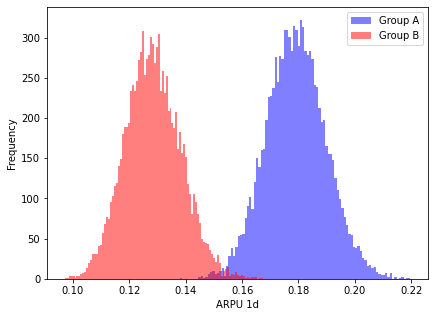

95% confidence interval for mean group A: [0.16 0.2 ]
95% confidence interval for mean group B: [0.11 0.15]


In [48]:
groupA_median_scores = list(map(np.mean, get_bootstrap_samples(revenue_short[(revenue_short['configTag'] == 'A') & (revenue_short['day'] == 1) & (revenue_short['rev'] < 150)]['rev'].values, 10000)))
groupB_median_scores = list(map(np.mean, get_bootstrap_samples(revenue_short[(revenue_short['configTag'] == 'B') & (revenue_short['day'] == 1) & (revenue_short['rev'] < 150)]['rev'].values, 10000)))

pylab.figure(figsize(15, 5))
pylab.subplot(1,2,1)
pylab.hist(groupA_median_scores, alpha = .5, color = 'b', label = 'Group A', bins = 100)
pylab.legend()

pylab.subplot(1,2,1)
pylab.hist(groupB_median_scores, alpha = .5, color = 'r', label = 'Group B', bins = 100)
pylab.legend()

# pylab.subplot(1,2,1)
# pylab.hist(groupC_median_scores, alpha = .5, color = 'g', label = 'Group C ARPU 1d', bins = 100)
# pylab.legend()

pylab.ylabel('Frequency') 
pylab.xlabel('ARPU 1d') 
pylab.show()

print("95% confidence interval for mean group A:",  stat_intervals(groupA_median_scores, 0.05))
print("95% confidence interval for mean group B:",  stat_intervals(groupB_median_scores, 0.05))

In [49]:
scipy.stats.mannwhitneyu(revenue_short[(revenue_short['configTag'] == 'A') & (revenue_short['day'] == 1) & (revenue_short['rev'] < 150)]['rev'].values, revenue_short[(revenue_short['configTag'] == 'B') & (revenue_short['day'] == 1) & (revenue_short['rev'] < 150)]['rev'].values, use_continuity=True, alternative='greater')

MannwhitneyuResult(statistic=1338414114.0, pvalue=6.232237559573415e-05)

In [50]:
revenue_short[(revenue_short['day'] == 7)]['rev'].sort_values().tail(20)

218425    197.440000
421192    217.741117
151043    224.391576
227778    238.086281
227777    238.086281
106176    264.490000
169180    267.740000
48574     269.850000
155462    274.054240
220365    274.860712
220364    274.860712
282729    309.832583
403242    325.690000
390854    406.110917
409974    519.450000
409975    519.450000
2326      522.460000
437818    566.138989
213305    588.943119
94530     669.370000
Name: rev, dtype: float64

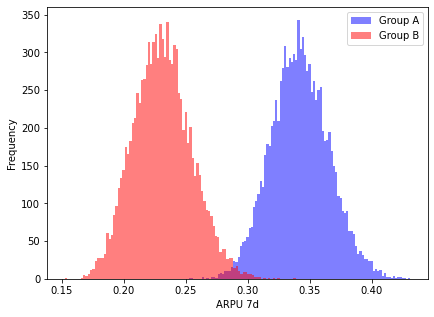

95% confidence interval for mean group A: [0.3  0.39]
95% confidence interval for mean group B: [0.19 0.28]


In [56]:
groupA_median_scores = list(map(np.mean, get_bootstrap_samples(revenue_short[(revenue_short['configTag'] == 'A') & (revenue_short['day'] == 7) & (revenue_short['installDate'] <= '2023-10-02') & (revenue_short['rev'] < 300)]['rev'].values, 10000)))
groupB_median_scores = list(map(np.mean, get_bootstrap_samples(revenue_short[(revenue_short['configTag'] == 'B') & (revenue_short['day'] == 7) & (revenue_short['installDate'] <= '2023-10-02') & (revenue_short['rev'] < 300)]['rev'].values, 10000)))

pylab.figure(figsize(15, 5))
pylab.subplot(1,2,1)
pylab.hist(groupA_median_scores, alpha = .5, color = 'b', label = 'Group A', bins = 100)
pylab.legend()

pylab.subplot(1,2,1)
pylab.hist(groupB_median_scores, alpha = .5, color = 'r', label = 'Group B', bins = 100)
pylab.legend()

# pylab.subplot(1,2,1)
# pylab.hist(groupC_median_scores, alpha = .5, color = 'g', label = 'Group C ARPU 1d', bins = 100)
# pylab.legend()

pylab.ylabel('Frequency') 
pylab.xlabel('ARPU 7d') 
pylab.show()

print("95% confidence interval for mean group A:",  stat_intervals(groupA_median_scores, 0.05))
print("95% confidence interval for mean group B:",  stat_intervals(groupB_median_scores, 0.05))

In [57]:
scipy.stats.mannwhitneyu(revenue_short[(revenue_short['configTag'] == 'A') & (revenue_short['day'] == 7) & (revenue_short['installDate'] <= '2023-10-02') & (revenue_short['rev'] < 300)]['rev'].values, revenue_short[(revenue_short['configTag'] == 'B') & (revenue_short['day'] == 7) & (revenue_short['installDate'] <= '2023-10-02') & (revenue_short['rev'] < 300)]['rev'].values, use_continuity=True, alternative='greater')

MannwhitneyuResult(statistic=667359357.0, pvalue=3.9445950404633924e-08)

In [53]:
revenue_short[(revenue_short['day'] == 14)]['rev'].sort_values().tail(20)

250068     239.780000
90595      256.016624
229271     261.804847
233074     262.600619
32303      264.490000
37769      269.850000
8631       274.054240
309863     322.017382
32024      332.660000
339293     337.006868
339292     337.006868
291882     350.680000
106527     364.110284
347744     406.110917
328719     519.450000
328720     519.450000
406476     582.012551
188207     796.190000
2327       831.210000
338621    1167.817436
Name: rev, dtype: float64

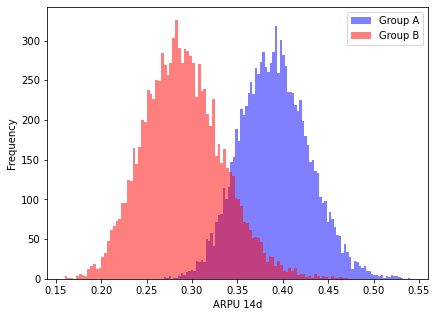

95% confidence interval for mean group A: [0.32 0.47]
95% confidence interval for mean group B: [0.21 0.38]


In [58]:
groupA_median_scores = list(map(np.mean, get_bootstrap_samples(revenue_short[(revenue_short['configTag'] == 'A') & (revenue_short['day'] == 14) & (revenue_short['installDate'] <= '2023-09-25') & (revenue_short['rev'] < 350)]['rev'].values, 10000)))
groupB_median_scores = list(map(np.mean, get_bootstrap_samples(revenue_short[(revenue_short['configTag'] == 'B') & (revenue_short['day'] == 14) & (revenue_short['installDate'] <= '2023-09-25') & (revenue_short['rev'] < 350)]['rev'].values, 10000)))

pylab.figure(figsize(15, 5))
pylab.subplot(1,2,1)
pylab.hist(groupA_median_scores, alpha = .5, color = 'b', label = 'Group A', bins = 100)
pylab.legend()

pylab.subplot(1,2,1)
pylab.hist(groupB_median_scores, alpha = .5, color = 'r', label = 'Group B', bins = 100)
pylab.legend()

# pylab.subplot(1,2,1)
# pylab.hist(groupC_median_scores, alpha = .5, color = 'g', label = 'Group C ARPU 1d', bins = 100)
# pylab.legend()

pylab.ylabel('Frequency') 
pylab.xlabel('ARPU 14d') 
pylab.show()

print("95% confidence interval for mean group A:",  stat_intervals(groupA_median_scores, 0.05))
print("95% confidence interval for mean group B:",  stat_intervals(groupB_median_scores, 0.05))

In [59]:
scipy.stats.mannwhitneyu(revenue_short[(revenue_short['configTag'] == 'A') & (revenue_short['day'] == 14) & (revenue_short['installDate'] <= '2023-09-25') & (revenue_short['rev'] < 350)]['rev'].values, revenue_short[(revenue_short['configTag'] == 'B') & (revenue_short['day'] == 14) & (revenue_short['installDate'] <= '2023-09-25') & (revenue_short['rev'] < 350)]['rev'].values, use_continuity=True, alternative='greater')

MannwhitneyuResult(statistic=211505825.0, pvalue=4.306938250270239e-06)

In [73]:

countries_A = revenue_short[(revenue_short['configTag'] == 'A') & (revenue_short['day'] == 7) & (revenue_short['installDate'] <= '2023-10-02') & (revenue_short['rev'] < 300)].groupby('userCountry').mean().sort_index()
countries_A['users'] = revenue_short[(revenue_short['configTag'] == 'A') & (revenue_short['day'] == 7) & (revenue_short['installDate'] <= '2023-10-02') & (revenue_short['rev'] < 300)].groupby('userCountry').nunique()['userID']

countries_B = revenue_short[(revenue_short['configTag'] == 'B') & (revenue_short['day'] == 7) & (revenue_short['installDate'] <= '2023-10-02') & (revenue_short['rev'] < 300)].groupby('userCountry').mean().sort_index()
countries_B['users'] = revenue_short[(revenue_short['configTag'] == 'B') & (revenue_short['day'] == 7) & (revenue_short['installDate'] <= '2023-10-02') & (revenue_short['rev'] < 300)].groupby('userCountry').nunique()['userID']
countries_A

,day,rev,return,users
userCountry,,,,
AD,7.0,0.000000,0.000000,1
AE,7.0,0.017686,0.048780,123
AF,7.0,0.000000,0.000000,25
AG,7.0,0.000000,0.000000,1
AL,7.0,0.000000,0.071429,28
...,...,...,...,...
WS,7.0,0.000000,0.000000,1
YE,7.0,0.000000,0.066667,15
ZA,7.0,0.268724,0.048000,124


In [71]:
Tier0 = ['US'] 
Tier1 = ['NO','AU','NZ','CH','FR','CA','JP','KR','DE','SE','UK','HK','FI','TW','NL','SG','SK','CN','AT','PT','ES', 'US']
Tier2 = ['GU','BH','HR','CY','GE','BG','SI','ME','DK','SA','AE','LV','LT','RO','IL','UA','MY','IE','CZ','BA','PL','IT','HU','EE']

In [74]:
countries_diff = countries_A - countries_B
countries_diff['users_A'] = countries_A['users']
countries_diff['arpu_A'] = countries_A['rev']
countries_diff['users_B'] = countries_B['users']
countries_diff['arpu_B'] = countries_B['rev']
countries_diff = countries_diff.loc[:,['rev', 'arpu_A', 'arpu_B', 'users_A', 'users_B']]
countries_diff['tier'] = countries_diff.index
countries_diff['tier'] = countries_diff['tier'].apply(lambda x: 'Tier01' if x in Tier1 else 'Tier2' if x in Tier2 else 'Tier3')
countries_diff = countries_diff[(countries_diff['users_A'] > 50) & (countries_diff['users_B'] > 50)]
countries_diff.sort_values(by=['rev'], ascending=False, inplace=True)
countries_diff.head(20)

,rev,arpu_A,arpu_B,users_A,users_B,tier
userCountry,,,,,,
SG,0.921058,1.072219,0.151160,173.0,134.0,Tier01
CA,0.895192,1.228090,0.332898,280.0,239.0,Tier01
AU,0.859742,1.183581,0.323839,181.0,144.0,Tier01
HK,0.765188,0.876015,0.110827,207.0,134.0,Tier01
HR,0.659002,0.722363,0.063362,97.0,84.0,Tier2
US,0.583428,1.715262,1.131833,2046.0,1637.0,Tier01
AT,0.499122,0.882995,0.383873,89.0,65.0,Tier01
IL,0.469417,0.504225,0.034808,213.0,159.0,Tier2
TR,0.461447,0.466280,0.004833,573.0,450.0,Tier3


In [76]:
final_greater = pd.DataFrame()
country_users = revenue_short[(revenue_short['day'] == 7) & (revenue_short['installDate'] <= '2023-10-02') & (revenue_short['rev'] < 300)].groupby('userCountry').nunique()['userID']
country_users = country_users[country_users >= 200]

for country in country_users.index:
    country_A = revenue_short[(revenue_short['userCountry'] == country) & (revenue_short['configTag'] == 'A') & (revenue_short['day'] == 7) & (revenue_short['installDate'] <= '2023-10-02') & (revenue_short['rev'] < 300)]
    country_B = revenue_short[(revenue_short['userCountry'] == country) & (revenue_short['configTag'] == 'B') & (revenue_short['day'] == 7) & (revenue_short['installDate'] <= '2023-10-02') & (revenue_short['rev'] < 300)]
    #print(country_A.head())
    #print(country_B.head())
    #break
    final_greater[country, 'pvalue'] = scipy.stats.mannwhitneyu(country_A['rev'].values, country_B['rev'].values, use_continuity=True, alternative='greater')
final_greater = final_greater.loc[1, :]
final_greater

(AE, pvalue)    0.890659
(AR, pvalue)    0.328753
(AU, pvalue)    0.260046
(AZ, pvalue)    0.043812
(BD, pvalue)    1.000000
(BR, pvalue)    0.037011
(BY, pvalue)    0.148015
(CA, pvalue)    0.101761
(CL, pvalue)    0.397388
(CN, pvalue)    0.172399
(CO, pvalue)    0.536697
(CZ, pvalue)    0.381966
(DE, pvalue)    0.093422
(DZ, pvalue)    1.000000
(EG, pvalue)    0.941073
(ES, pvalue)    0.805300
(FR, pvalue)    0.463506
(GE, pvalue)    0.118961
(HK, pvalue)    0.206264
(HU, pvalue)    0.348747
(ID, pvalue)    0.038639
(IL, pvalue)    0.045565
(IN, pvalue)    0.162721
(IQ, pvalue)    0.026732
(IT, pvalue)    0.421497
(JP, pvalue)    0.168818
(KH, pvalue)    1.000000
(KR, pvalue)    0.032364
(KZ, pvalue)    0.030045
(MM, pvalue)    1.000000
(MX, pvalue)    0.021989
(MY, pvalue)    0.234524
(NL, pvalue)    0.825600
(PE, pvalue)    1.000000
(PH, pvalue)    0.039069
(PK, pvalue)    0.096232
(PL, pvalue)    0.245474
(PT, pvalue)    0.178893
(RO, pvalue)    0.258764
(RS, pvalue)    0.876738


In [77]:
final_less = pd.DataFrame()
country_users = revenue_short[(revenue_short['day'] == 7) & (revenue_short['installDate'] <= '2023-10-02') & (revenue_short['rev'] < 300)].groupby('userCountry').nunique()['userID']
country_users = country_users[country_users >= 200]

for country in country_users.index:
    country_A = revenue_short[(revenue_short['userCountry'] == country) & (revenue_short['configTag'] == 'A') & (revenue_short['day'] == 7) & (revenue_short['installDate'] <= '2023-10-02') & (revenue_short['rev'] < 300)]
    country_B = revenue_short[(revenue_short['userCountry'] == country) & (revenue_short['configTag'] == 'B') & (revenue_short['day'] == 7) & (revenue_short['installDate'] <= '2023-10-02') & (revenue_short['rev'] < 300)]
    #print(country_A.head())
    #print(country_B.head())
    #break
    final_less[country, 'pvalue'] = scipy.stats.mannwhitneyu(country_A['rev'].values, country_B['rev'].values, use_continuity=True, alternative='less')
final_less = final_less.loc[1, :]
final_less

(AE, pvalue)    0.111050
(AR, pvalue)    0.672160
(AU, pvalue)    0.741040
(AZ, pvalue)    0.956496
(BD, pvalue)    1.000000
(BR, pvalue)    0.963041
(BY, pvalue)    0.852903
(CA, pvalue)    0.898520
(CL, pvalue)    0.604203
(CN, pvalue)    0.828945
(CO, pvalue)    0.466231
(CZ, pvalue)    0.619043
(DE, pvalue)    0.906630
(DZ, pvalue)    1.000000
(EG, pvalue)    0.059330
(ES, pvalue)    0.195084
(FR, pvalue)    0.536795
(GE, pvalue)    0.882775
(HK, pvalue)    0.794746
(HU, pvalue)    0.653319
(ID, pvalue)    0.961399
(IL, pvalue)    0.954750
(IN, pvalue)    0.837346
(IQ, pvalue)    0.973319
(IT, pvalue)    0.579087
(JP, pvalue)    0.831447
(KH, pvalue)    1.000000
(KR, pvalue)    0.967672
(KZ, pvalue)    0.970155
(MM, pvalue)    1.000000
(MX, pvalue)    0.978052
(MY, pvalue)    0.765828
(NL, pvalue)    0.174827
(PE, pvalue)    1.000000
(PH, pvalue)    0.960977
(PK, pvalue)    0.904283
(PL, pvalue)    0.754765
(PT, pvalue)    0.825221
(RO, pvalue)    0.742515
(RS, pvalue)    0.125807


In [80]:
final_greater.sort_values(inplace=True)
final_greater.head(20)

(TR, pvalue)    0.000627
(RU, pvalue)    0.001539
(MX, pvalue)    0.021989
(IQ, pvalue)    0.026732
(KZ, pvalue)    0.030045
(ZA, pvalue)    0.031577
(KR, pvalue)    0.032364
(BR, pvalue)    0.037011
(ID, pvalue)    0.038639
(PH, pvalue)    0.039069
(AZ, pvalue)    0.043812
(IL, pvalue)    0.045565
(DE, pvalue)    0.093422
(PK, pvalue)    0.096232
(CA, pvalue)    0.101761
(GE, pvalue)    0.118961
(SG, pvalue)    0.121730
(US, pvalue)    0.142358
(BY, pvalue)    0.148015
(IN, pvalue)    0.162721
Name: 1, dtype: float64

In [79]:
final_less.sort_values(inplace=True)
final_less.head(10)

(EG, pvalue)    0.059330
(AE, pvalue)    0.111050
(RS, pvalue)    0.125807
(TH, pvalue)    0.149520
(NL, pvalue)    0.174827
(SA, pvalue)    0.184669
(ES, pvalue)    0.195084
(UA, pvalue)    0.464412
(CO, pvalue)    0.466231
(TW, pvalue)    0.507087
Name: 1, dtype: float64

In [81]:
countries_better = revenue_short[revenue_short['userCountry'].isin(['TR', 'RU', 'MX', 'IQ', 'KZ', 'ZA', 'KR', 'BR', 'ID', 'PH', 'AZ', 'IL'])]
countries_better = countries_better[(countries_better['day'] == 7) & (countries_better['installDate'] <= '2023-10-02') & (countries_better['rev'] < 300)]
countries_better_A = countries_better.groupby('userCountry').mean()
countries_better_A['arpu_A'] = countries_better[countries_better['configTag'] == 'A'].groupby('userCountry').mean()['rev']
countries_better_A['users_A'] = countries_better[countries_better['configTag'] == 'A'].groupby('userCountry').nunique()['userID']
countries_better_A['arpu_B'] = countries_better[countries_better['configTag'] == 'B'].groupby('userCountry').mean()['rev']
countries_better_A['users_B'] = countries_better[countries_better['configTag'] == 'B'].groupby('userCountry').nunique()['userID']
countries_better_A = countries_better_A[['arpu_A', 'arpu_B', 'users_A', 'users_B']] 
countries_better_A

,arpu_A,arpu_B,users_A,users_B
userCountry,,,,
AZ,0.028295,0.000000,349,341
BR,0.223654,0.032339,827,592
ID,0.088155,0.032010,1077,820
IL,0.504225,0.034808,213,159
IQ,0.148176,0.017984,912,789
KR,0.824231,0.843358,670,526
KZ,0.121856,0.000000,359,319
MX,0.057160,0.030964,728,615
PH,0.021327,0.001943,1446,1314
